In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
import seaborn as sns
import time
from dask.distributed import Client, LocalCluster
from dask.diagnostics import ProgressBar
import time
import numpy as np

from water_masses import processing, correlation

In [3]:
cluster = LocalCluster(n_workers = 1, threads_per_worker=4, memory_limit='12GB')
client = Client(cluster, "tcp://127.0.0.1:61868")
client

Client Scheduler: tcp://127.0.0.1:53452 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 4 Memory: 12.00 GB


In [4]:
# start = time.time()
# future = client.submit(processing.main, test=False)
# result = future.result()
# print("{:.2f} seconds".format(time.time() - start))

In [5]:
start = time.time()
future = client.submit(correlation.main, test=False)
result = future.result()
print("{:.2f} seconds".format(time.time() - start))

12725.38 seconds


In [6]:
result

<xarray.Dataset>
Dimensions:    (lag: 24, latitude: 375, longitude: 297)
Coordinates:
  * longitude  (longitude) float32 -19.88889 -19.77778 ... 12.88856 12.99967
  * latitude   (latitude) float32 40.06667 40.13334 ... 64.93458 65.00125
  * lag        (lag) int64 0 30 60 90 120 150 180 ... 540 570 600 630 660 690
Data variables:
    R          (lag, latitude, longitude) float64 nan nan nan ... nan nan nan

In [7]:
client.shutdown()

distributed.nanny - WARNING - Worker process still alive after 3 seconds, killing


In [8]:
# result.isel(lag=0).R.plot(vmin=-1, vmax=1, cmap="RdBu_r")

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


In [9]:
result

<xarray.Dataset>
Dimensions:    (lag: 24, latitude: 375, longitude: 297)
Coordinates:
  * longitude  (longitude) float32 -19.88889 -19.77778 ... 12.88856 12.99967
  * latitude   (latitude) float32 40.06667 40.13334 ... 64.93458 65.00125
  * lag        (lag) int64 0 30 60 90 120 150 180 ... 540 570 600 630 660 690
Data variables:
    R          (lag, latitude, longitude) float64 nan nan nan ... nan nan nan

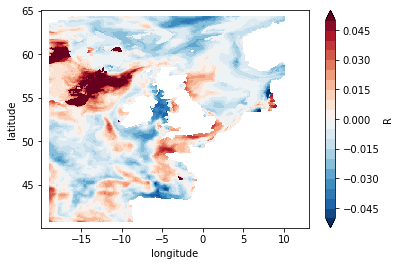

In [61]:
(result.R.sel(lag=30*23) - result.R.sel(lag=30*0)).plot(levels=np.linspace(-0.05, 0.05, 21))

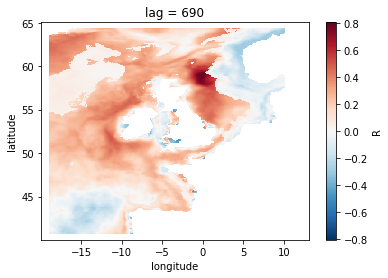

In [63]:
result.R.sel(lag=30*23).plot()

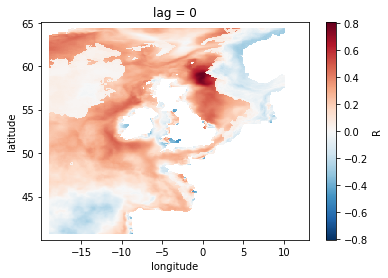

In [64]:
result.R.sel(lag=30*0).plot()